In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import itertools
%matplotlib inline

In [2]:
df = pd.read_json('Video_Games_5.json', lines=True)

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


In [4]:
review_df = df[['reviewText', 'overall']]
review_df = review_df.dropna()

In [5]:
sentiments = []
subjectivity = []
    
for reviews in df['reviewText']:
    review = TextBlob(reviews)
    sentiment = review.sentiment
    sentiments.append(sentiment[0])
    subjectivity.append(sentiment[1])

review_df['sentiments'] = sentiments
review_df['subjectivity'] = subjectivity

In [6]:
review_df['score'] = np.where(review_df['overall'] > 3, 1, 0)

In [7]:
review_df.groupby('score').size()

score
0     56791
1    174989
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = review_df.sentiments.values.reshape(-1, 1)
y = review_df.score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.metrics import confusion_matrix
#a function that will help us plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(class_weight='balanced')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print('Training Scores: ', logr.score(X_train, y_train))
print('Test Score: ', logr.score(X_test, y_test))
print('Cross Validation Scores: ', cross_val_score(logr, X_train, y_train, cv=5))

Training Scores:  0.6718748073912454
Test Score:  0.6736848160612074
Cross Validation Scores:  [0.67 0.67 0.68 0.67 0.67]


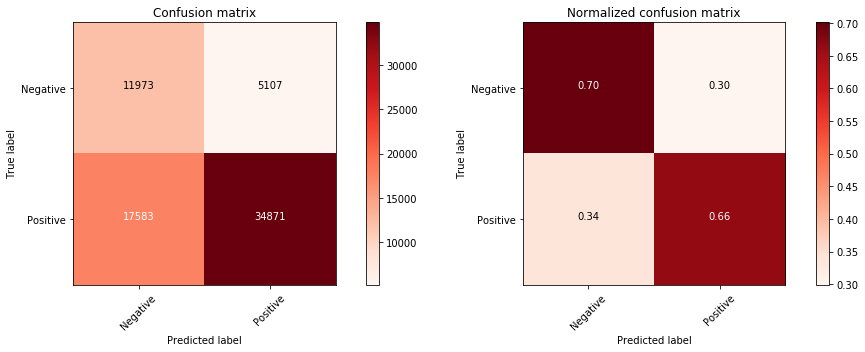

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

In [14]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print('Train Score: ', bnb.score(X_train, y_train))
print('Test Score: ', bnb.score(X_test, y_test))
print('Cross Validation Scores: ', cross_val_score(bnb, X_train, y_train, cv=5))

Train Score:  0.7556549930352674
Test Score:  0.7563781747058993
Cross Validation Scores:  [0.76 0.76 0.76 0.75 0.75]


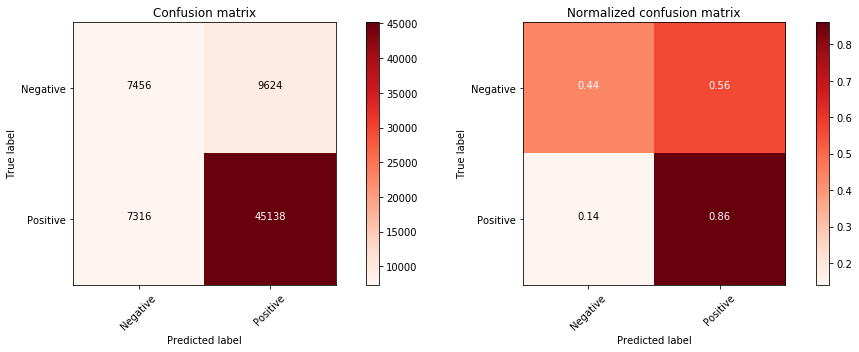

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_bnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Positive'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()